In [17]:
import numpy as np, matplotlib.pyplot as plt, networkx as nx
import matplotlib as mpl
import sys
#COLOR = 'white'
#mpl.rcParams['text.color'] = COLOR
#mpl.rcParams['axes.labelcolor'] = COLOR
#mpl.rcParams['xtick.color'] = COLOR
#mpl.rcParams['ytick.color'] = COLOR
sys.path.insert(0, '../')
from Utils import plotting as plotz
plt.style.use('seaborn-poster')
plt.close()
beta = 1
sigma = -1
def update(x, t, beta, sigma):
    x1, x2 = x
    y1 = x1 * (x1**2 + x2**2 - 1) * (x1**2 + x2**2 - 2) - x2
    y2 = x2 * (x1**2 + x2**2 - 1) * (x1**2 + x2**2 - 2) + x1
    # y1 = beta * x[0] - x[1] + sigma * x[0] * (x[0]**2 + x[1]**2)
    # y2 = x[0] + beta * x[1] + sigma * x[1] * (x[0]**2 + x[1]**2)
    return  np.asarray([y1, y2])


start = [0.01, .01]

xr, yr = (-3, 3), (-3, 3)
x, y = np.meshgrid(np.linspace(*xr), np.linspace(*yr))
from scipy import integrate
xy = np.stack((x.ravel(), y.ravel()))
dx, dy = update(xy, [], beta, sigma)

stream   = integrate.odeint(update, start, np.linspace(0, 5, 50), args = (beta, sigma))
unstream = integrate.odeint(update, [1.01, 1.01], np.linspace(0, 1, 50), args = (beta, sigma))

tmp = np.where(np.diff(unstream) > 3e2)[0]
if tmp.size:
    unstream[tmp.max():] = np.nan
    


/home/casper/miniconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater


/home/casper/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


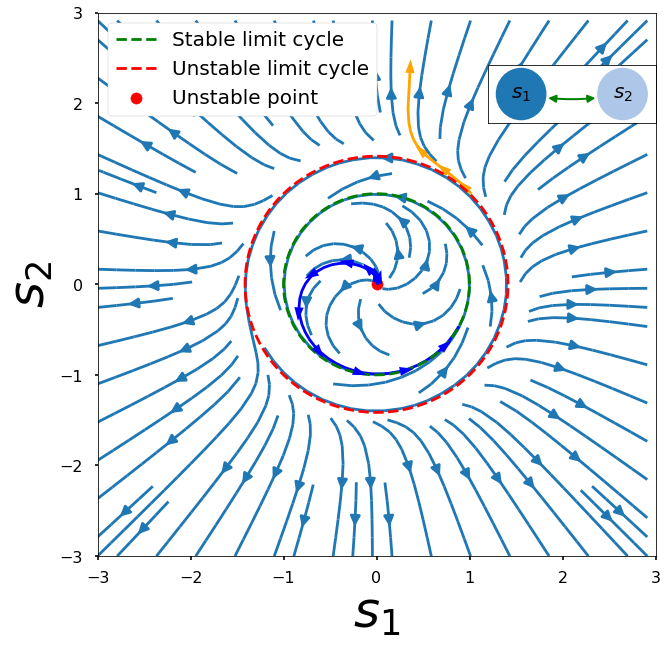

In [25]:
# %%
# unstream[np.isfinite(unstream) == False] = xr[1] + yr[1]
fig, ax = plt.subplots(figsize = (10, 10))
ax.streamplot(x, y, \
              dx.reshape(x.shape), dy.reshape(y.shape), \
              density = 1, \
              arrowsize = 2)

idx = 5
stable_color   = 'blue'
unstable_color = 'orange'
# ax.streamplot(x, y, dx.reshape(x.shape, dy.reshape(y.shape), \
#               density = 1, arrowsize = 2, start_points = [[0.01, 0.01], [0.01, 0.01]],\
#               color = stable_color)
ax.plot(*stream.T, '-', color = stable_color)

[ax.arrow(*i, *j, color = stable_color, head_width = .1, lw = 0, zorder = 5) for i, j in zip(stream[::idx], \
                                                                                   np.diff(stream, axis = 0)[::idx])]
ax.plot(*unstream.T, '-', color = unstable_color)
# idx = unstream.shape[0] // 2

idx = 10
[ax.arrow(*i, *j, color = unstable_color, head_width = .1, lw = 0) for i, j in zip(unstream[::idx], \
                                                                                   np.diff(unstream, axis = 0)[::idx])]

# the radius of the circle
r = np.sqrt(1)
theta = np.linspace(0, 2 * np.pi, 100)
# compute x1 and x2
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

inset = ax.inset_axes((.7, .7, .3, .3), transform = ax.axes.transAxes)


g = nx.Graph()
g.add_edge('$s_1$', '$s_2$')
idx = .01
# positions = {i : np.array(j) * idx for i, j in dict(nx.spring_layout(g)).items()}
positions = {node : np.array([1 * j, 0]) for node, j in zip(g.nodes(), [-1, 1])}

plotz.addGraphPretty(g, inset, positions = positions, circle = dict(radius = .5), annotate = dict(fontsize =  40))
inset.axis('on')
inset.set(xticks = [], yticks = [])

ax.plot(x1, x2, 'g--', label = 'Stable limit cycle')
# ax.plot(*stream.T, '-', color = 'g')

ax.plot(x1*np.sqrt(2), x2*np.sqrt(2), 'r--', label = 'Unstable limit cycle')
ax.scatter([0], [0], color = 'red', label = 'Unstable point', zorder = 2)
ax.set(xlim = xr, ylim = yr)
ax.set_xlabel('$s_1$', fontsize = 50)
ax.set_ylabel('$s_2$', fontsize = 50)
ax.legend(framealpha = 1, fontsize = 20)

fig.show()


#fig.savefig('phase.eps')
fig.savefig('/home/casper/projects/thesis/entropy/figures/phase_example.eps', transparent = 0)